# Transient simulation of a Si homo pn-junction

The following code loads the needed modules.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from synumses.one_dimension.scharfetter_gummel_bernoulli import bernoulli, jacobian, update_b, first_jacobian, first_update_b, hole_current_density, electron_current_density

import synumses.one_dimension.parameters as parameters

from synumses.one_dimension.functions import calc_p_density, calc_n_density


import synumses.one_dimension.solver as solver

#parameters.n = 20
#parameters.init_geometry()
#parameters.init_parameters()
#parameters.init_default_doping()

# Simulation of the default device

By default the package uses the following parameters for silicon:<br>
* **parameters.n  = 400**, 400 cell points
* **parameters.lx = 400E-9**, total length of device $l_\mathrm{x} = 400\,\mathrm{nm}$
* **parameters.C[000:199]   = -1E24**, left part of device is p-doped $N_\mathrm{A} = 10^{24}\,\mathrm{m}^{-3}$
* **parameters.C[200:399] = +1E24**, right part of device is p-doped $N_\mathrm{D} = 10^{24}\,\mathrm{m}^{-3}$
* **parameters.Epsilon[0:399] = $\varepsilon_0 \cdot \varepsilon_\mathrm{r, Si}$**, materialparameter von silicon 
* **parameters.Ec[0:399] = $1.12\,\mathrm{eV}$**, energie level of conduction band
* **parameters.Ev[0:399] = $0\,\mathrm{eV}$**, energie level of valence band
* **parameters.Cau[0:399] = $2.3\cdot 10^{-20} \mathrm{\dfrac{m^3}{s}}$** defines the recombination rate :
    $\dfrac{\mathrm{d}n}{\mathrm{d}t} = Cau \left(n \cdot p - n_\mathrm{i}^2 \right)$


## Plot some default parameters
* Band diagram
* Doping

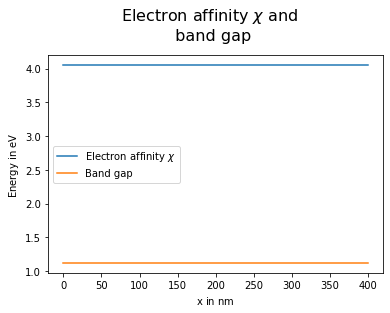

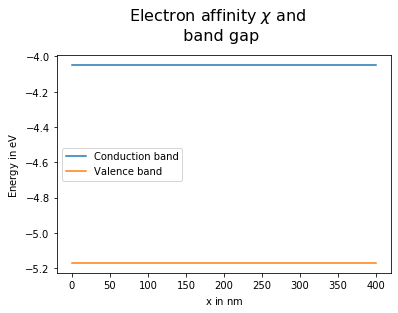

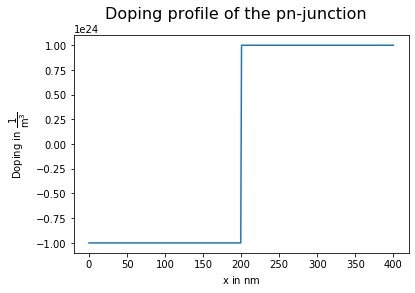

In [2]:
#
# Plot electron affinity  and \n band gap
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Electron affinity $\chi$ and \n band gap", y= 1.05, fontsize=16)

axis.plot(parameters.pos_x * 1E9, parameters.Chi, label='Electron affinity $\chi$')
axis.plot(parameters.pos_x * 1E9, parameters.Eg, label='Band gap')


plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")


axis.legend(loc = 6)
plt.show()

#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Electron affinity $\chi$ and \n band gap", y= 1.05, fontsize=16)

axis.plot(parameters.pos_x * 1E9, -parameters.Chi, label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.Eg - parameters.Chi, label='Valence band')


plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")


axis.legend(loc = 6)
plt.show()

#
# Plot doping profile of the pn-junction
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Doping profile of the pn-junction", fontsize=16)

axis.plot(parameters.pos_x * 1E9, parameters.C, label='Doping')


plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Doping in $\mathrm{\dfrac{1}{m^3}}$")
plt.show()


## Calculate the potential according the doping
The following function calculates the potential according the doping level.
This is needed the have a first guess of the potential.

In [3]:
solver.solve_from_doping()

Now, we plot the potential according the doping level. It's not smooth.

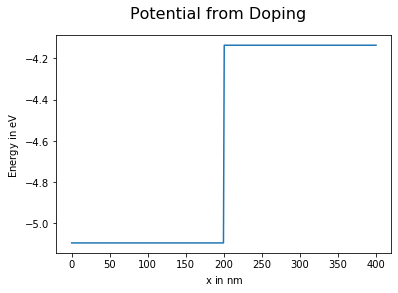

In [4]:
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential from Doping", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, parameters.u[0::3])
plt.show()

## Calculate the potential
Now, let's calculate the potential considering diffusion but no biasing.<br>
One simulation using **solver.solve_no_bias()** must be performed befor simulatoins with biasing.

In [5]:
solver.solve_no_bias()

/home/pabele/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


True

## Plot the potential

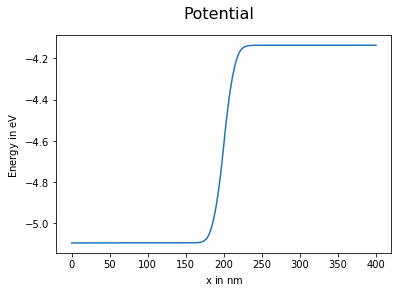

In [6]:
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, parameters.u[0::3])
plt.show()

## Calculate the potential and quasi Fermi levels without biasing

In [7]:
solver.solve_bias(0,0)

Norm of b:  0.8952415985141152
Norm of x: 7.932211641212356e-13


True

## Plot the results
* potential,
* electron and hole density,
* electron and hole current density, and

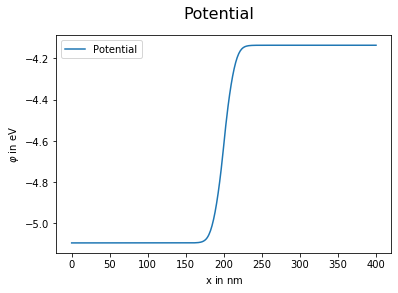

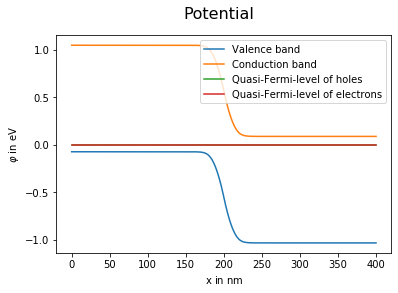

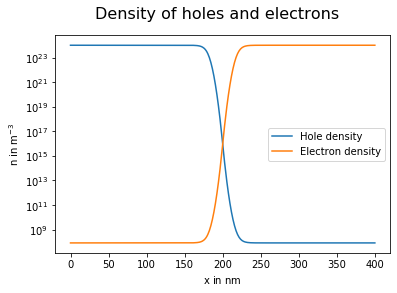

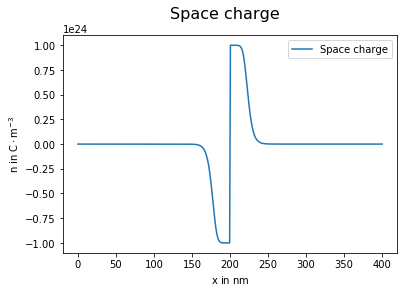

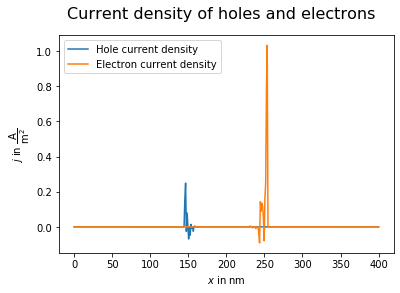

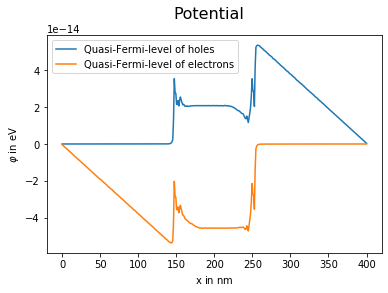

In [8]:
#
# Plot potential
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, parameters.u[0::3], label='Potential')
axis.legend()
plt.show()

#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi -  parameters.Eg, label='Valence band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi                 , label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')

axis.legend()
plt.show()


#
# Plot electron and hole density
#
p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{m^{-3}}$")

axis.semilogy(parameters.pos_x * 1E9, p, label='Hole density')
axis.semilogy(parameters.pos_x * 1E9, n, label='Electron density')
axis.legend()
plt.show()

#
# Plot space charge
#
p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Space charge", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{C \cdot m^{-3}}$")

axis.plot(parameters.pos_x * 1E9, p-n+parameters.C, label='Space charge')

axis.legend()
plt.show()

#
# Plot electron and hole current density 
#
j_p =     hole_current_density()
j_n = electron_current_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Current density of holes and electrons", fontsize=16)

plt.xlabel(r"$x$ in $\mathrm{nm}$")
plt.ylabel(r"$j$ in $\mathrm{\dfrac{A}{m^{2}}}$")

axis.plot(parameters.pos_x * 1E9, j_p, label='Hole current density')
axis.plot(parameters.pos_x * 1E9, j_n, label='Electron current density')
axis.legend()
plt.show()


#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')

axis.legend()
plt.show()

## Simulating a time step

In [35]:
solver.solve_no_bias()
solver.solve_bias(0,0)

print(parameters.u_old[1])

solver.time_step()

print(parameters.u_old[1])

solver.solve_bias_transient(0,0.0,1E-11)

Norm of b:  0.8952415985141152
Norm of x: 7.932211641212356e-13
nan
3.163514248205179e-30
Norm of b:  1.3085683148508376
Norm of x: 2.173318817673105e-12


True

In [14]:
u_dc = 0.0
u_ac  = 0.7
d_t = 0.01E-3
t_steps = 200
f = 1E3

voltage = []
current_density = []

time = np.linspace(0, d_t * t_steps, t_steps)

solver.solve_no_bias()
solver.solve_bias(0,0)

for t in time:
    
    volt = u_dc + u_ac*np.sin(2*np.pi*f*t)
    
    print("### Voltage:", volt)
    print("### Steps:", t)
    solver.time_step()
    solver.solve_bias_transient(0,volt,d_t)

    voltage.append(volt)
    j = np.mean(hole_current_density() + electron_current_density())
    current_density.append(j)
    
    

Norm of b:  0.8952415985141152
Norm of x: 7.932211641212356e-13
### Voltage: 0.0
### Steps: 0.0
Norm of b:  1.3085683148508376
Norm of x: 1.924636908380386e-12
### Voltage: 0.04417394191887155
### Steps: 1.0050251256281408e-05
Norm of b:  989496298982.7357
Norm of x: 1.017775645285175
Norm of b:  1.9405475126533038
Norm of x: 0.14456469534869817
Norm of b:  1.820003438350977
Norm of x: 0.020508109425190046
Norm of b:  0.7976739546111498
Norm of x: 0.0006123909843600255
Norm of b:  0.8486027413923172
Norm of x: 6.110577195863371e-07
### Voltage: 0.08817179354740229
### Steps: 2.0100502512562815e-05
Norm of b:  985551876479.095
Norm of x: 1.0276224836569638
Norm of b:  26417768.09260899
Norm of x: 0.10132600455386925
Norm of b:  557.0330346288888
Norm of x: 0.013034061016953997
Norm of b:  1.582903523726304
Norm of x: 0.0003410178363939731
Norm of b:  1.629597124413713
Norm of x: 2.8129913054377766e-07
### Voltage: 0.13181816654280248
### Steps: 3.0150753768844224e-05
Norm of b:  9776787

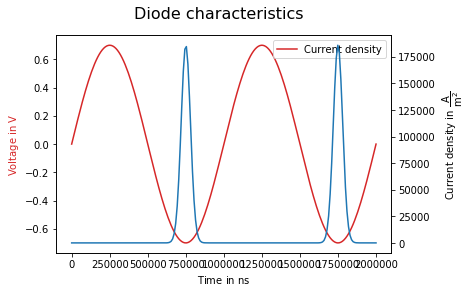

In [16]:
#
# Diode charactersistics
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)

axis.plot(time*1E9, voltage, label='Current density', color='tab:red')

axis.set_xlabel(r"Time in $\mathrm{ns}$")
axis.set_ylabel(r"Voltage in $\mathrm{V}$", color='tab:red')

axis.legend()
#plt.ylim(-1E-6,1E-6)
#plt.show()



axis2 = axis.twinx()
axis2.plot(time*1E9, current_density, label='Current density')

axis2.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")




#plt.ylim(-1E-6,1E-6)
plt.show()


In [17]:
u_dc = 0.0
u_ac  = 0.7
d_t = 0.01E-6
t_steps = 200
f = 1E6

voltage = []
current_density = []

time = np.linspace(0, d_t * t_steps, t_steps)

solver.solve_no_bias()
solver.solve_bias(0,0)

for t in time:
    
    volt = u_dc + u_ac*np.sin(2*np.pi*f*t)
    
    print("### Voltage:", volt)
    print("### Steps:", t)
    solver.time_step()
    solver.solve_bias_transient(0,volt,d_t)

    voltage.append(volt)
    j = np.mean(hole_current_density() + electron_current_density())
    current_density.append(j)

Norm of b:  0.8952415985141152
Norm of x: 7.932211641212356e-13
### Voltage: 0.0
### Steps: 0.0
Norm of b:  1.3085683148508376
Norm of x: 1.9248191648520095e-12
### Voltage: 0.04417394191887155
### Steps: 1.0050251256281407e-08
Norm of b:  989496298982.7357
Norm of x: 1.0179636039299704
Norm of b:  234.4289872723638
Norm of x: 0.14456732266773653
Norm of b:  3.9540518792898647
Norm of x: 0.020522259929187315
Norm of b:  0.9575899469104345
Norm of x: 0.0006123650654201067
Norm of b:  0.7537326376353872
Norm of x: 6.095184713175163e-07
### Voltage: 0.08817179354740229
### Steps: 2.0100502512562813e-08
Norm of b:  985551876479.0825
Norm of x: 1.0276235334958932
Norm of b:  26249.01182027149
Norm of x: 0.10133663762219548
Norm of b:  1.273711944746317
Norm of x: 0.01303918397270255
Norm of b:  1.1925252644854316
Norm of x: 0.00034140132311543574
Norm of b:  1.441729671199717
Norm of x: 2.820274086010009e-07
### Voltage: 0.13181816654280248
### Steps: 3.0150753768844216e-08
Norm of b:  9776

In [19]:
#
# Diode charactersistics
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)

axis.plot(time*1E9, voltage, label='Current density', color='tab:red')

axis.set_xlabel(r"Time in $\mathrm{ns}$")
axis.set_ylabel(r"Voltage in $\mathrm{V}$", color='tab:red')

axis.legend()
#plt.ylim(-1E-6,1E-6)
#plt.show()



axis2 = axis.twinx()
axis2.plot(time*1E9, current_density, label='Current density')

axis2.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")


#plt.ylim(-1E-6,1E-6)
plt.show()


u_dc = 0.0
u_ac  = 0.7
d_t = 0.001E-6
t_steps = 200
f = 10E6

voltage = []
current_density = []

time = np.linspace(0, d_t * t_steps, t_steps)

solver.solve_no_bias()
solver.solve_bias(0,0)

for t in time:
    
    volt = u_dc + u_ac*np.sin(2*np.pi*f*t)
    
    print("### Voltage:", volt)
    print("### Steps:", t)
    solver.time_step()
    solver.solve_bias_transient(0,volt,d_t)

    voltage.append(volt)
    j = np.mean(hole_current_density() + electron_current_density())
    current_density.append(j)


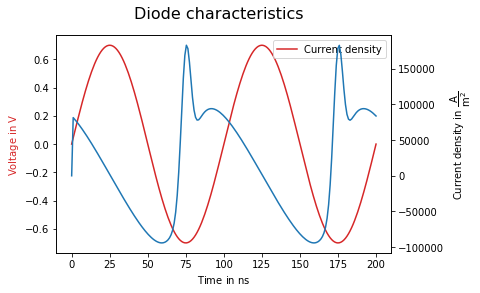

In [23]:
#
# Diode charactersistics
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)

axis.plot(time*1E9, voltage, label='Current density', color='tab:red')

axis.set_xlabel(r"Time in $\mathrm{ns}$")
axis.set_ylabel(r"Voltage in $\mathrm{V}$", color='tab:red')

axis.legend()
#plt.ylim(-1E-6,1E-6)
#plt.show()



axis2 = axis.twinx()
axis2.plot(time*1E9, current_density, label='Current density')

axis2.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")


#plt.ylim(-1E-6,1E-6)
plt.show()

In [28]:
u_dc = 0.0
u_ac  = 0.7
d_t = 0.0001E-6
t_steps = 200
f = 100E6

voltage = []
current_density = []

time = np.linspace(0, d_t * t_steps, t_steps)

solver.solve_no_bias()
solver.solve_bias(0,0)

for t in time:
    
    volt = u_dc + u_ac*np.sin(2*np.pi*f*t)
    
    print("### Voltage:", volt)
    print("### Steps:", t)
    solver.time_step()
    solver.solve_bias_transient(0,volt,d_t)

    voltage.append(volt)
    j = np.mean(hole_current_density() + electron_current_density())
    current_density.append(j)


Norm of b:  0.8952415985141152
Norm of x: 7.932211641212356e-13
### Voltage: 0.0
### Steps: 0.0
Norm of b:  1.3085683148508376
Norm of x: 1.9428058796135348e-12
### Voltage: 0.04417394191887154
### Steps: 1.0050251256281407e-10
Norm of b:  989496298982.7357
Norm of x: 1.0161792672159957
Norm of b:  22664.83794194232
Norm of x: 0.14521720086051323
Norm of b:  939.105422265557
Norm of x: 0.020593999064164124
Norm of b:  1.1756651827925297
Norm of x: 0.000616178760547618
Norm of b:  1.0141847271332436
Norm of x: 6.160491624498014e-07
### Voltage: 0.08817179354740226
### Steps: 2.0100502512562814e-10
Norm of b:  985551876479.1332
Norm of x: 1.0283577160721864
Norm of b:  17874.308148349108
Norm of x: 0.10772074110060208
Norm of b:  74.45894324118352
Norm of x: 0.014574088913322398
Norm of b:  1.0482269506834674
Norm of x: 0.00043110643234477104
Norm of b:  1.1485402854986115
Norm of x: 4.615404947207801e-07
### Voltage: 0.13181816654280248
### Steps: 3.015075376884422e-10
Norm of b:  97767

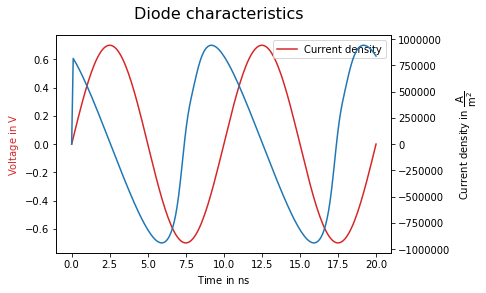

In [30]:
#
# Diode charactersistics
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)

axis.plot(time*1E9, voltage, label='Current density', color='tab:red')

axis.set_xlabel(r"Time in $\mathrm{ns}$")
axis.set_ylabel(r"Voltage in $\mathrm{V}$", color='tab:red')

axis.legend()
#plt.ylim(-1E-6,1E-6)
#plt.show()



axis2 = axis.twinx()
axis2.plot(time*1E9, current_density, label='Current density')

axis2.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")


#plt.ylim(-1E-6,1E-6)
plt.show()

In [35]:
u_dc = 0.0
u_ac  = 0.7
d_t = 0.04E-9
t_steps = 200
f = .25E9

voltage = []
current_density = []

time = np.linspace(0, d_t * t_steps, t_steps)

solver.solve_no_bias()
solver.solve_bias(0,0)

for t in time:
    
    volt = u_dc + u_ac*np.sin(2*np.pi*f*t)
    
    print("### Voltage:", volt)
    print("### Steps:", t)
    solver.time_step()
    solver.solve_bias_transient(0,volt,d_t)

    voltage.append(volt)
    j = np.mean(hole_current_density() + electron_current_density())
    current_density.append(j)


Norm of b:  0.8952415985141152
Norm of x: 7.932211641212356e-13
### Voltage: 0.0
### Steps: 0.0
Norm of b:  1.3085683148508376
Norm of x: 1.9721615834355233e-12
### Voltage: 0.04417394191887154
### Steps: 4.0201005025125623e-11
Norm of b:  989496298982.7357
Norm of x: 1.0155560907302803
Norm of b:  55159.23019923627
Norm of x: 0.1459434337982169
Norm of b:  1524.0888622280718
Norm of x: 0.020791216831036657
Norm of b:  1.0846399279333137
Norm of x: 0.0006289025511135766
Norm of b:  0.7846936046851594
Norm of x: 6.437627870744438e-07
### Voltage: 0.08817179354740226
### Steps: 8.040201005025125e-11
Norm of b:  985551876479.3757
Norm of x: 1.0299503089246664
Norm of b:  44718.21023880454
Norm of x: 0.11914925175525203
Norm of b:  186.44040350606164
Norm of x: 0.01757675248847293
Norm of b:  0.7183848918794143
Norm of x: 0.0006551988158429467
Norm of b:  1.1707886948929573
Norm of x: 1.1766756447071199e-06
Norm of b:  0.6115667638586724
Norm of x: 5.4502449519129655e-12
### Voltage: 0.131

/home/pabele/programming/python/synumses/synumses/one_dimension/scharfetter_gummel_bernoulli.py:16635: RuntimeWarning: overflow encountered in exp
  parameters.A[3*i+1,3*(i-1)+0] = -parameters.T*parameters.kB*parameters.mu_p[i]*(0.5*parameters.Nv[i+0]*parameters.q*np.exp(parameters.q*(-0.5*parameters.Chi[i+0] - 0.5*parameters.Chi[i-1] - 0.5*parameters.Eg[i+0] - 0.5*parameters.Eg[i-1] - parameters.u[(3*i+0)+0] + parameters.u[(3*i+0)+1])/(parameters.T*parameters.kB))/(parameters.T*parameters.kB) - parameters.Nv[i-1]*parameters.q*(1.0 - 0.5*parameters.q*(parameters.u[(3*i+0)+0] - parameters.u[3*(i-1)+0])/(parameters.T*parameters.kB))*np.exp(parameters.q*(-0.5*parameters.Chi[i+0] - 0.5*parameters.Chi[i-1] - 0.5*parameters.Eg[i+0] - 0.5*parameters.Eg[i-1] - parameters.u[3*(i-1)+0] + parameters.u[3*(i-1)+1])/(parameters.T*parameters.kB))/(parameters.T*parameters.kB) + 0.5*parameters.Nv[i-1]*parameters.q*np.exp(parameters.q*(-0.5*parameters.Chi[i+0] - 0.5*parameters.Chi[i-1] - 0.5*parameters.

Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: -0.06620586545639237
### Steps: 3.939698492462311e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: -0.022097984835368414
### Steps: 3.9798994974874365e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.022097984835366825
### Steps: 4.020100502512562e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.0662058654563908
### Steps: 4.060301507537688e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.11004983007707538
### Steps: 4.100502512562814e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.15345510379338306
### Steps: 4.140703517587939e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.19624866045190908
### Steps: 4.1809045226130646e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.2382599123828785
### Steps: 4.22110552763819e-09
Norm of b:  nan
Norm of x: nan
norm is nan
### Voltage: 0.2793213904126381
### Steps: 4.261306532663316e-09
Norm of b:  nan
N

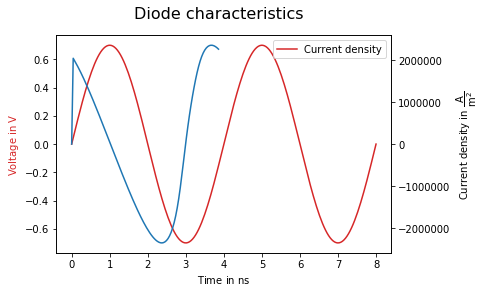

In [36]:
#
# Diode charactersistics
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)

axis.plot(time*1E9, voltage, label='Current density', color='tab:red')

axis.set_xlabel(r"Time in $\mathrm{ns}$")
axis.set_ylabel(r"Voltage in $\mathrm{V}$", color='tab:red')

axis.legend()
#plt.ylim(-1E-6,1E-6)
#plt.show()



axis2 = axis.twinx()
axis2.plot(time*1E9, current_density, label='Current density')

axis2.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")


#plt.ylim(-1E-6,1E-6)
plt.show()